In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
#import json
import datetime
import seaborn as sns
#import matplotlib as mlp
import matplotlib.pyplot as plt
#from datetime import datetime
#from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder, StandardScaler
#from sklearn.metrics import r2_score
#from sklearn.linear_model import LinearRegression

# import dataset
dfPhiladelphia = pd.read_csv("data/tmp/dfPhiladelphia.csv.zip")
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589215 entries, 0 to 589214
Data columns (total 32 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   start_date                              589215 non-null  object 
 1   end_date                                589215 non-null  object 
 2   start_time_hourly                       589215 non-null  int64  
 3   end_time_hourly                         589215 non-null  int64  
 4   start_station_id                        589215 non-null  int64  
 5   end_station_id                          589215 non-null  int64  
 6   bike_id                                 589215 non-null  int64  
 7   start_latitude                          589215 non-null  float64
 8   start_longitude                         589215 non-null  float64
 9   end_latitude                            589215 non-null  float64
 10  end_longitude                           5892

# 2. Descriptive Analytics

In [ ]:
palette = "Spectral"

## 2.1 Temporal Demand Patterns and Seasonality

In this section, we will:
- Demonstrate how fleet usage varies during a day, a week and the year. 
- What patterns do you observe? Explain.

In [ ]:
#dfPhiladelphia.mean()

In [ ]:
#dfPhiladelphia["numOfRentedBikes"].describe()

### 2.1.1 Fleet usage variety per day

In [ ]:
######## ((MAYBE ALSO FOR Percentage of used bikes))

In [ ]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- Tagsüber () wird mehr ausgeliehen, als Nachts ()
- 17-18 und 8-9 scheint was zu sein, vlt. Berufsverkehr? Wir werden uns das anscvhauen :D

In [ ]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isWeekend")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- In this graph we observe a rise in Fahradleih zum Berufsverkehr (isWeekend = False) zu den Zeiten 6,7,8,9,17,18
- Am Wochenende (isWeekend = True) ist generell am Tag 11 bis 16/17 Uhr mehr verleih (Mehr Freizeit)
- Partyfahrer Nachts am Wochende?? -> Next plot

In [ ]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isRushhour")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

In [ ]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isHoliday")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

ERKLÄRUNG AUCH FÜR Warum keine Unterschiede

In [ ]:
###### vielleicht Linien über mean
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="season")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- Nutzung ist über seasons über UHrzeit gleich, aber weniger im Winter

In [ ]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="user_type", hue_order=["Day Pass","Indego30","Indego365","IndegoFlex","Walk-up"])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

Tarife erklären, z.b. Day Ticket um 8, weil Bahn weg

In [ ]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isPrecip")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

ERKLÄRUNG

In [ ]:
### ALS ÜBERSICHTLICHEN ABSCHLUSS + Überleitung zu Week
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette,hue="dayOfWeek",hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

NETTER TEXT

### 2.1.2 Fleet usage variety per week

In [ ]:
# initialize new target_value y="numOfRentedBikesDaily"

In [ ]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- liegt vlt. am Abomodell

In [ ]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,hue="user_type",order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],hue_order=["Day Pass","Indego30","Indego365","IndegoFlex","Walk-up"])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

In [ ]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,hue="isPrecip",order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

In [ ]:
#SHOWOFF ORDER
#sns.boxplot(x="start_time_hourly",y="numOfRentedBikes",data=dfPhiladelphia,palette=palette,order=[22,23,0,1,2,3,4,5,6],hue="isWeekend")
#fig = plt.gcf()
#fig.set_size_inches(16, 9)
#plt.show()

### 2.1.2 Fleet usage variety during the year

In [36]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

dates = ['2019/01/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        '2019/03/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        '2019/05/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        '2019/07/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        '2019/09/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        '2019/11/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]

In [47]:
#dfWeahter = pd.Dataframe(columns=['start_date', 'end_date', 'min_temp', 'max_temp', 'isPrecip',])
dfWeather = pd.read_csv("data/tmp/dfWeather.csv.zip")
dfWeather.drop(dfWeather.tail(1).index,inplace=True)

# convert the 'Date' column to datetime format
dfWeather['date_time']= pd.to_datetime(dfWeather['date_time'])

dfWeather['month'] = dfWeather['date_time'].dt.round("H").dt.month
dfWeather['week'] = dfWeather['date_time'].dt.round("H").dt.week
dfWeather['date'] = dfWeather['date_time'].dt.round("H").dt.date

C:\Users\Jonas\AppData\Local\Temp\ipykernel_7740\1009223013.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dfWeather['week'] = dfWeather['date_time'].dt.round("H").dt.week


In [35]:
def create_df_average_max_temp(time):
    
    # dataframe for monthly average max temparatures
    if time == 'month':
        dfWeather_average_max_temp = dfWeather.groupby(['month'])['max_temp'].mean().reset_index()
    # dataframe for weekly average max temparatures
    elif time == 'week':
        dfWeather_average_max_temp = dfWeather.groupby(['week'])['max_temp'].mean().reset_index()
    # dataframe for daily average max temparatures
    elif time == 'date':
        dfWeather_average_max_temp = dfWeather.groupby(['date'])['max_temp'].mean().reset_index()
    else:
        return "False Statement. Please provide other input."
    
    return dfWeather_average_max_temp['max_temp']

In [31]:
def create_df_precip_rate(timeframe):
    
    dfWeather_precip_rate = pd.DataFrame(dfWeather)
    dfWeather_precip_rate["precip_sum"] = dfWeather_precip_rate["isPrecip"].map({True: 1., False: 0.})
    
    # get the accummulated value for precip_rate for each month
    dfWeather_precip_rate = dfWeather_precip_rate.groupby([timeframe])['precip_sum'].sum().reset_index()
   
    if timeframe == 'month':
        # add sum of days per month column
        hours_per_month_dict = dfWeather.groupby(['month'])['month'].count().to_dict()
        dfWeather_precip_rate['hours_per_month'] = dfWeather_precip_rate['month'].map(hours_per_month_dict)
        # get the monthly precip rate
        dfWeather_precip_rate['precip_rate'] = dfWeather_precip_rate['precip_sum']/dfWeather_precip_rate['hours_per_month'] 
    elif timeframe == 'week':
        # get the weekly precip rate
        hours_per_week = 7*24
        dfWeather_precip_rate['precip_rate'] = dfWeather_precip_rate['precip_sum']/hours_per_week
    elif timeframe == 'date':
        # get the precip rate
        hours_per_day = 24
        dfWeather_precip_rate['precip_rate'] = dfWeather_precip_rate['precip_sum']/hours_per_day
    else:
        return "False Statement. Please provide other input."
    
    return dfWeather_precip_rate['precip_rate']

In [41]:
def create_plot_for_visualization(plot_type, df, timeframe, y_value, max_temp, precip_rate, title, y_axis_left, y_axis_right):
    
    fig, ax1 = plt.subplots(figsize=(12,6))
    
    # checking which kind of plot should be shown
    if plot_type == "barplot":
        sns.barplot(data = df, x='start_' + timeframe, y = y_value, alpha=0.5, ax=ax1, color='royalblue')
    elif plot_type == "lineplot":
        sns.lineplot(data = df, x='start_' + timeframe, y = y_value, marker='o', sort = False, ax=ax1, color='royalblue')
    else:
        return "False input. Define right plot type."
    
    # check whether visualization of precip rate requested
    if max_temp:
        # lineplot for weather data - average max temp per month
        ax2 = ax1.twinx()
        sns.lineplot(data = create_df_average_max_temp(timeframe), marker='o', sort = False, ax=ax2, color='darkorange')
    
    # check whether visualization of precip rate requested
    if precip_rate:
        # lineplot for weather data - precip rate per month 
        ax3 = ax1.twinx()
        sns.lineplot(data = create_df_precip_rate(timeframe), marker='o', sort = False, ax=ax3, color='forestgreen')
        ax3.spines['right'].set_position(('axes',1.05))
        
    # check which style for the labels of the x axis is requested
    if timeframe == 'month':
        # set ticks on x axis to named months
        plt.xticks(range(len(months)), months, fontsize=10, rotation=0)
    elif timeframe == 'date':
        # set ticks on x axis to certain dates
        plt.xticks(range(len(dates)), dates, fontsize=10, rotation=0)
    
    # styling of the plot
    # set title & axis labels
    ax1.set_title(title)
    ax1.set_xlabel(timeframe)
    ax1.set_ylabel(y_axis_left, color="royalblue")
    ax2.set_ylabel(y_axis_right,color="darkorange")
    if precip_rate:
        ax3.set_ylabel("Precip Rate for each " + timeframe,color="forestgreen")

    # set color of y axis 
    ax1.tick_params(axis='y',colors="royalblue")
    ax2.tick_params(axis='y',colors="darkorange")
    if precip_rate:
        ax3.tick_params(axis='y',colors="forestgreen")
        ax2.spines['right'].set_color("darkorange")
        ax3.spines['right'].set_color("forestgreen")
        ax3.spines['left'].set_color("royalblue")
    elif not precip_rate:
        ax2.spines['right'].set_color("darkorange")
        ax2.spines['left'].set_color("royalblue")

    fig = plt.gcf()
    fig.set_size_inches(16, 9)
    plt.show()

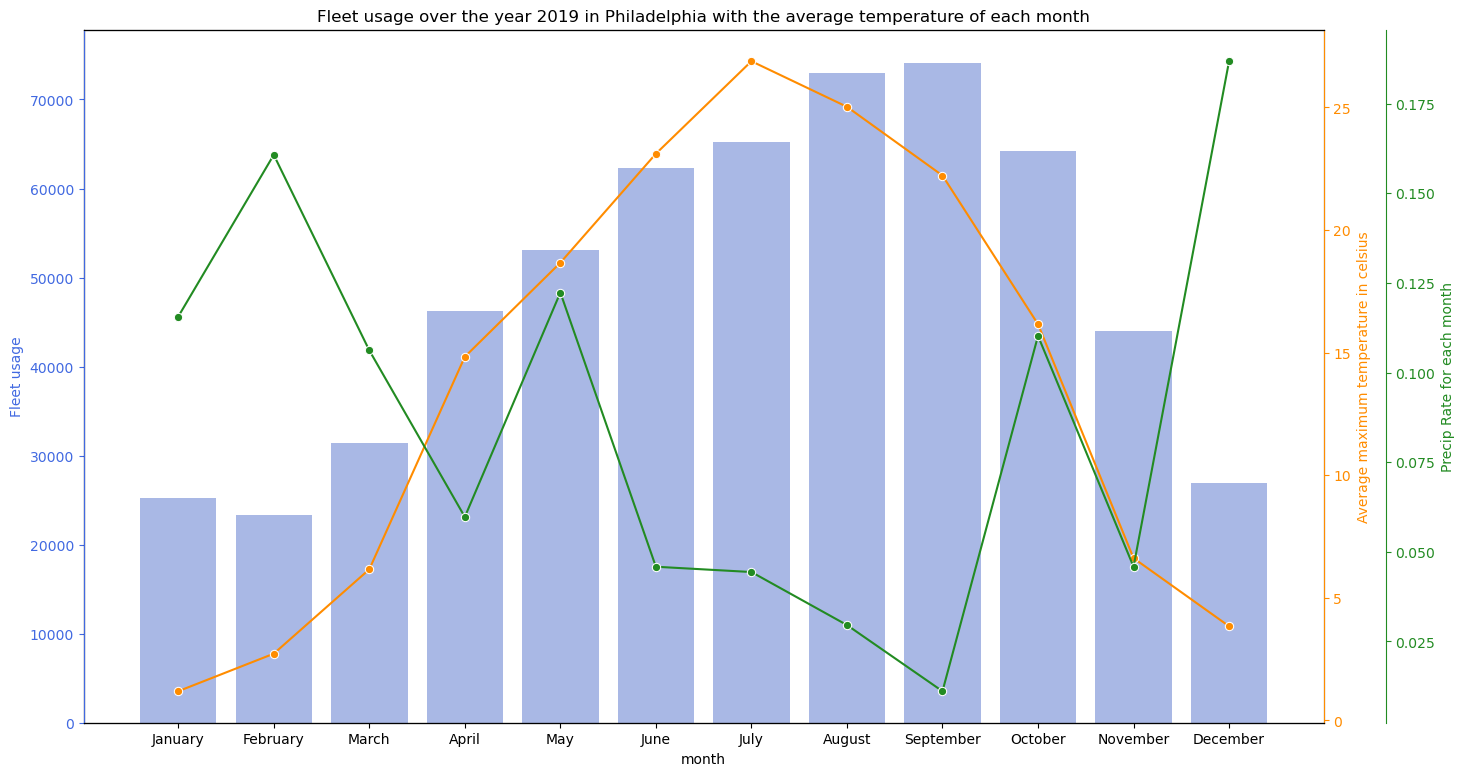

In [42]:
create_plot_for_visualization("barplot", dfPhiladelphia, 'month', 'numOfRentedBikesMonthly', True, True, 
                             "Fleet usage over the year 2019 in Philadelphia with the average temperature of each month",
                             "Fleet usage", "Average maximum temperature in celsius")

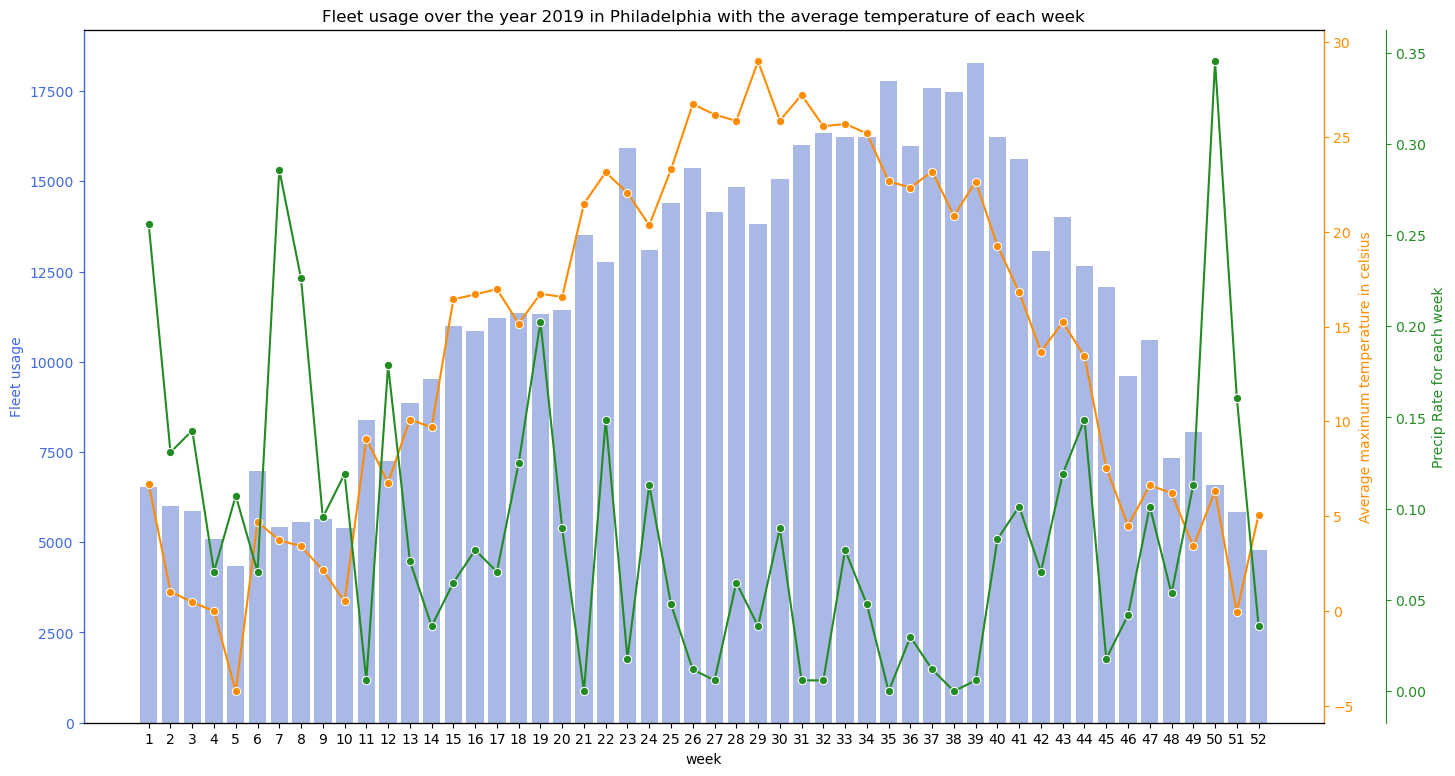

In [43]:
create_plot_for_visualization("barplot", dfPhiladelphia, 'week', 'numOfRentedBikesWeekly', True, True, 
                             "Fleet usage over the year 2019 in Philadelphia with the average temperature of each week",
                             "Fleet usage", "Average maximum temperature in celsius")

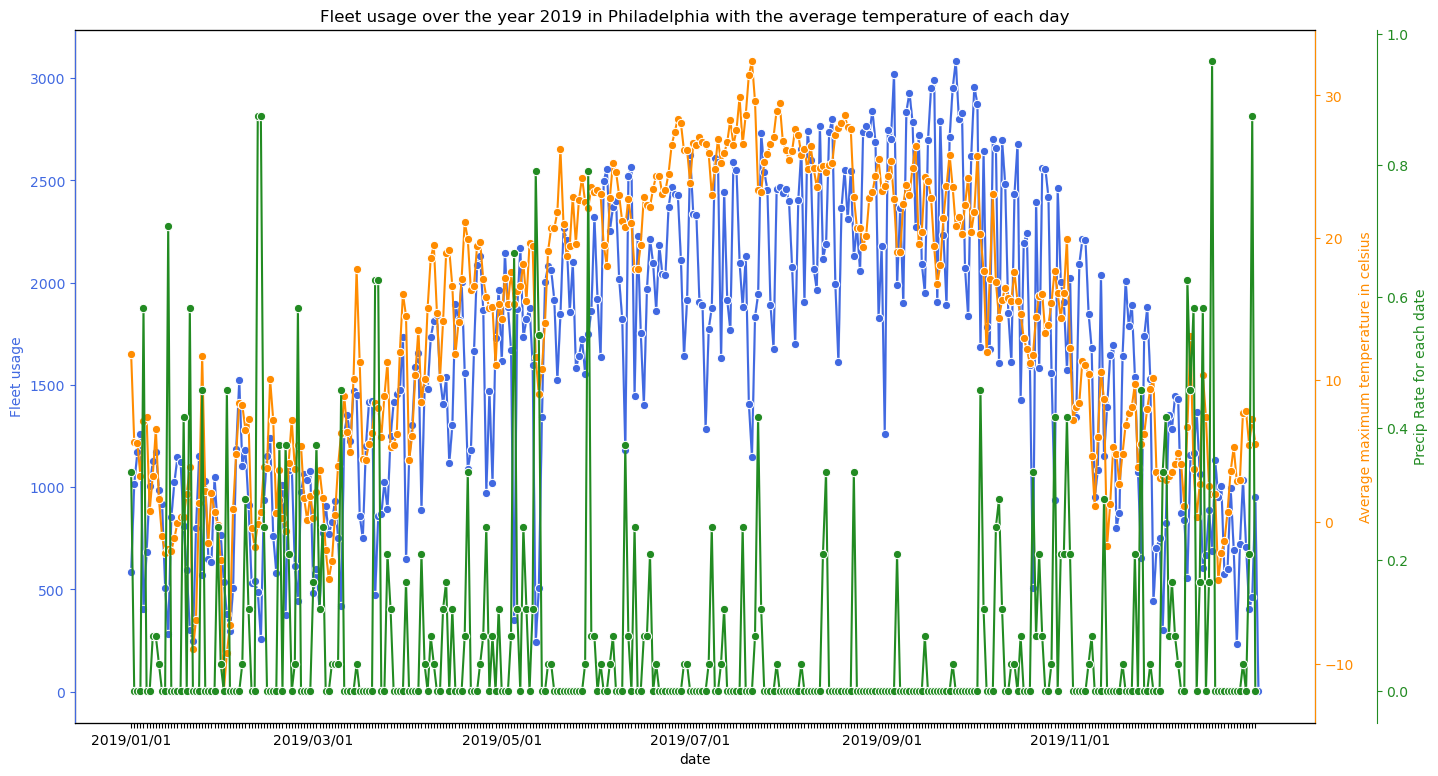

In [48]:
create_plot_for_visualization("lineplot", dfPhiladelphia, 'date', 'numOfRentedBikesDaily', True, True, 
                             "Fleet usage over the year 2019 in Philadelphia with the average temperature of each day",
                             "Fleet usage", "Average maximum temperature in celsius")

#### Utilization

##### Information about INDEGO [Source](https://www.phila.gov/2019-05-02-indego-announces-expansion-of-its-electric-bike-fleet-new-stations/#:~:text=ABOUT%20INDEGO%0AThe%20City%20of%20Philadelphia%20launched%20Indego%20in%202015%20as%20the%20city%E2%80%99s%20newest%20form%20of%20public%20transportation%20with%2060%20stations%20and%20600%20bikes%20and%20expanded%20in%202018%20to%20over%20130%20stations%20and%201%2C400%20bikes.) 
The City of Philadelphia launched Indego in 2015 as the city’s newest form of public transportation with 60 stations 
and 600 bikes and **expanded in 2018** to over 130 stations and **1,400 bikes**.  [Source](https://www.phila.gov/2019-05-02-indego-announces-expansion-of-its-electric-bike-fleet-new-stations/#:~:text=ABOUT%20INDEGO%0AThe%20City%20of%20Philadelphia%20launched%20Indego%20in%202015%20as%20the%20city%E2%80%99s%20newest%20form%20of%20public%20transportation%20with%2060%20stations%20and%20600%20bikes%20and%20expanded%20in%202018%20to%20over%20130%20stations%20and%201%2C400%20bikes.)<br>
In their annual Report from 2019, INDEGO states that their **system scope** include **130 stations**, **250 electric bikes** and **1.500 classic bikes**. Accordingly the **bike fleet of INDEGO** include **1.750 bikes** (regardless which kind). This report is based on **data from April 2019 to April 2020**. [Source](https://www.rideindego.com/wp-content/uploads/2020/12/Indego-2019-ANNUAL-REPORT.pdf)

In [6]:
#dataframe preparation for utilization rate of fleet
dfIndegoBikeFleet =  pd.DataFrame(dfPhiladelphia, columns=['bike_id'])

dfIndegoBikeFleet.drop_duplicates(inplace=True)

# store sum of unique bike ids in variable
counter_bike_fleet = dfIndegoBikeFleet['bike_id'].count()
print("There are", counter_bike_fleet, "unique bike IDs in the original INDEGO dataset from 2019.")
print("INDEGO's bike fleet in 2019:", counter_bike_fleet, "bikes")

There are 1674 unique bike IDs in the original INDEGO dataset from 2019.
INDEGO's bike fleet in 2019: 1674 bikes


In the following calculations of the fleet utilization we are going to use the value of **1674 bikes** as reference for INDEGO's bike fleet. This assumption makes sense since our calculated value is between the researched values of 1400 bicycles in 2018 & 1750 bicycles by April 2020 and accurately reflects the time frame of 2019.

In [37]:
def calculate_df_utilization_rate(time):
    dfUtilization_rate =  pd.DataFrame(dfPhiladelphia, columns=[time, 'bike_id'])
    dfUtilization_rate.drop_duplicates(inplace=True)
    if time == 'start_month':
        dfUtilization_rate = dfUtilization_rate.groupby(['start_month'])['bike_id'].count().reset_index()
    elif time == 'start_week':
        dfUtilization_rate = dfUtilization_rate.groupby(['start_week'])['bike_id'].count().reset_index()
    elif time == 'start_date':
        dfUtilization_rate = dfUtilization_rate.groupby(['start_date'])['bike_id'].count().reset_index()
    else:
        return "False Statement. Please provide other input."
    
    dfUtilization_rate.rename(columns={"bike_id": "counter_bikes"}, inplace = True)
    dfUtilization_rate['util_rate'] = dfUtilization_rate['counter_bikes'] / counter_bike_fleet
    
    return dfUtilization_rate

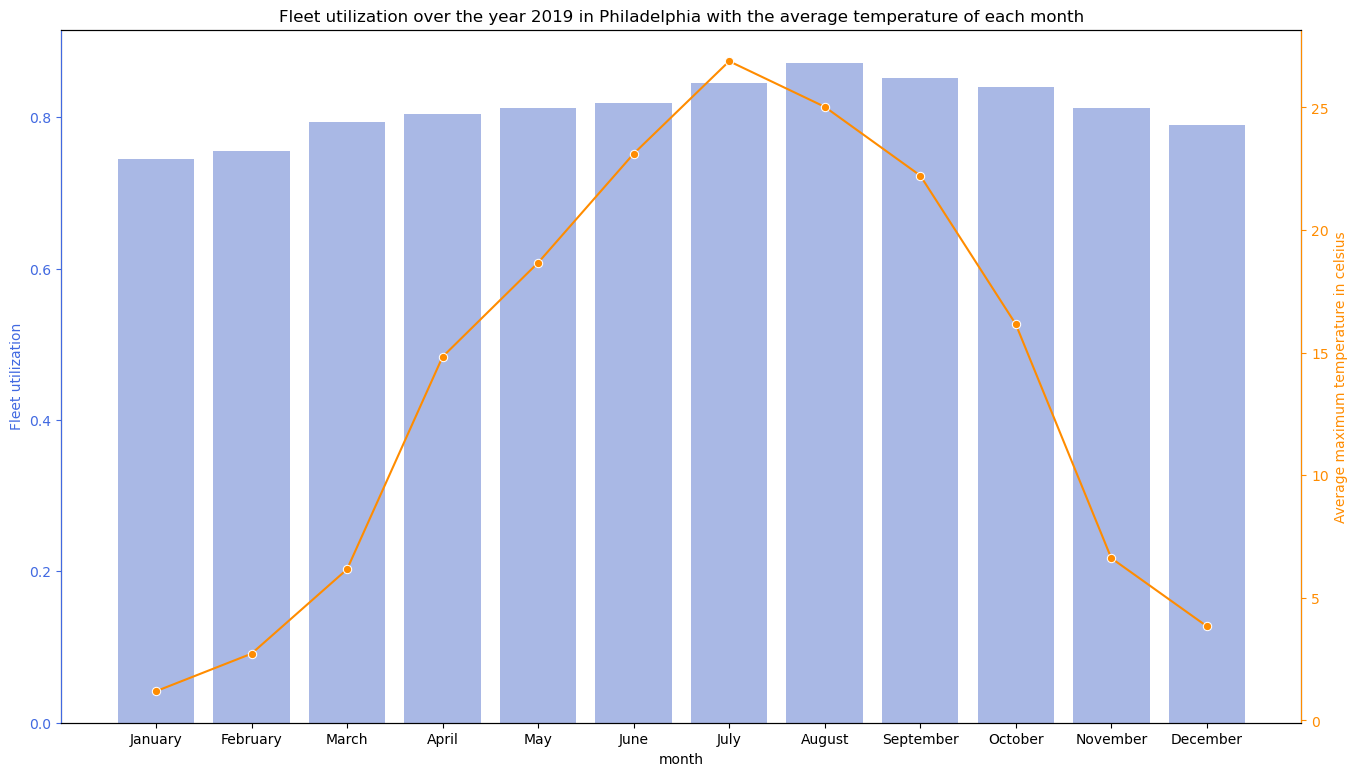

In [55]:
create_plot_for_visualization("barplot", calculate_df_utilization_rate('start_month'), 'month', 'util_rate', True, False, 
                             "Fleet utilization over the year 2019 in Philadelphia with the average temperature of each month",
                             "Fleet utilization", "Average maximum temperature in celsius")

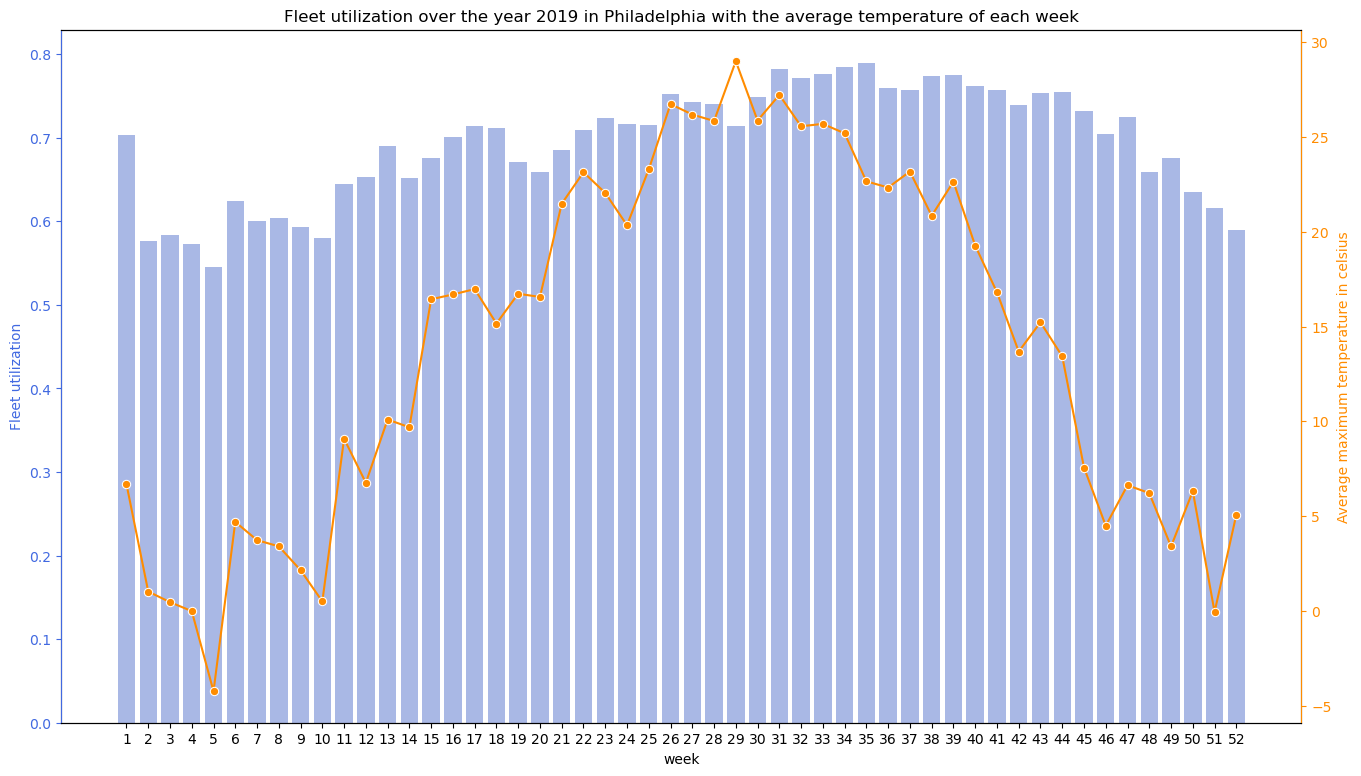

In [54]:
create_plot_for_visualization("barplot", calculate_df_utilization_rate('start_week'), 'week', 'util_rate', True, False, 
                             "Fleet utilization over the year 2019 in Philadelphia with the average temperature of each week",
                             "Fleet utilization", "Average maximum temperature in celsius")

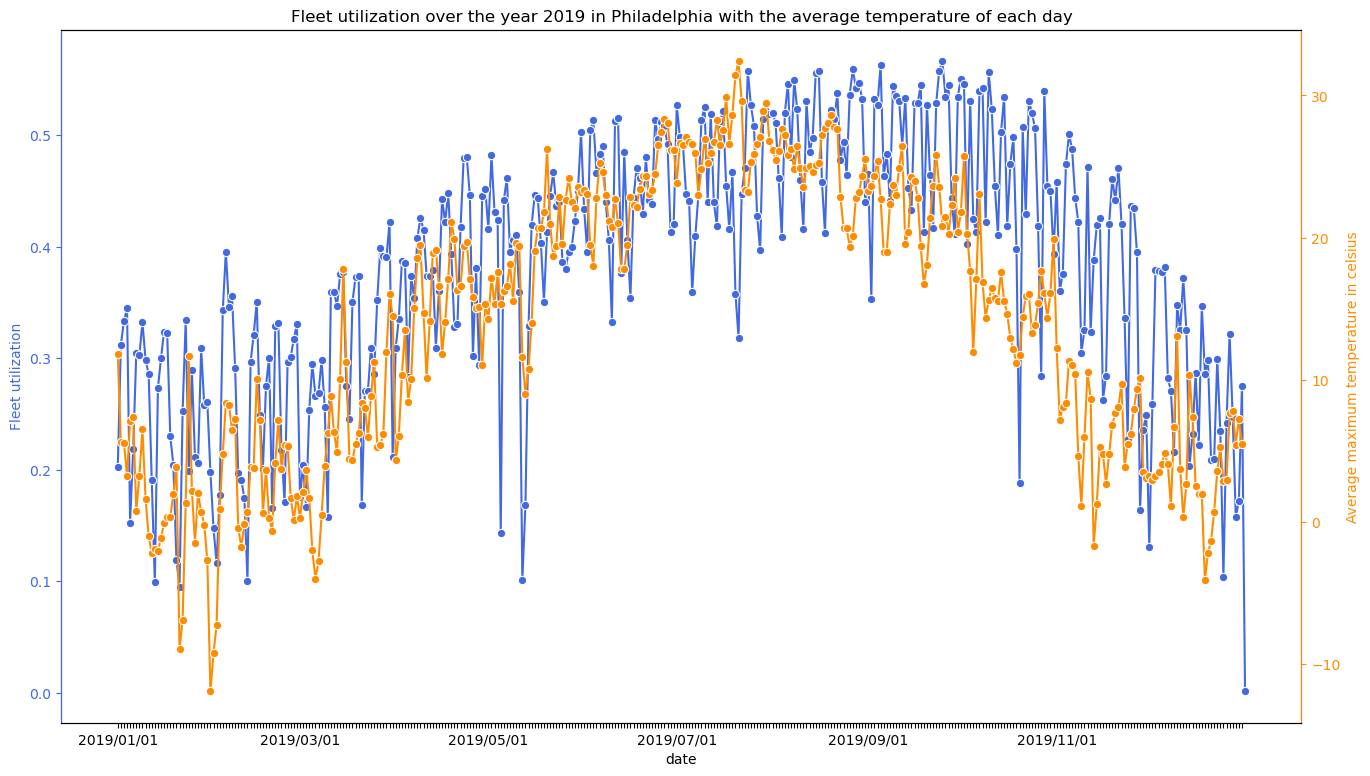

In [53]:
create_plot_for_visualization("lineplot", calculate_df_utilization_rate('start_date'), 'date', 'util_rate', True, False, 
                             "Fleet utilization over the year 2019 in Philadelphia with the average temperature of each day",
                             "Fleet utilization", "Average maximum temperature in celsius")

In [80]:
dfFleet_usage_hourly_over_2019 = pd.DataFrame(dfPhiladelphia, columns=['start_month', 'start_time_hourly', 'numOfRentedBikesHourly'])

dfFleet_usage_hourly_over_2019 = dfFleet_usage_hourly_over_2019.groupby(['start_month', 'start_time_hourly'])['numOfRentedBikesHourly'].count().reset_index()

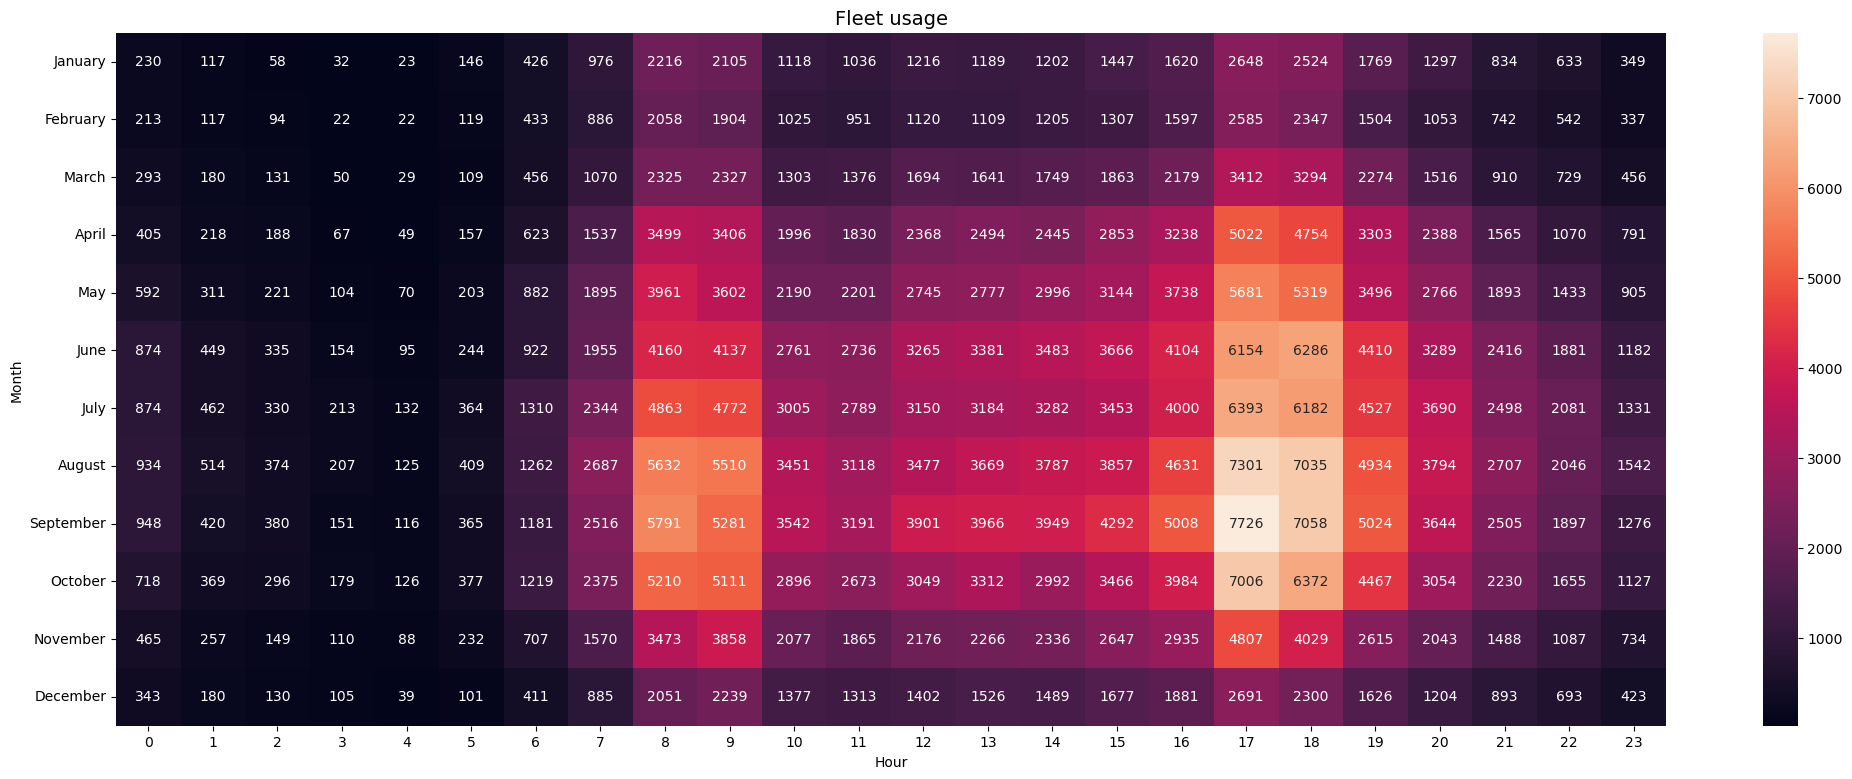

In [81]:
pivot = dfFleet_usage_hourly_over_2019.pivot(index='start_month', columns='start_time_hourly', values='numOfRentedBikesHourly')

# hier vllt. zur Conclusion noch eine Heatmap 
hours = np.arange(0,24,1)
f, ax = plt.subplots(figsize=(25, 9), dpi=100)

ax = sns.heatmap(pivot, annot=True, fmt="d", ax=ax, xticklabels=hours, yticklabels=months)
ax.axes.set_title("Fleet usage", fontsize=14)
ax.set(xlabel='Hour', ylabel='Month');
plt.yticks(rotation=0)
bottom, top = ax.get_ylim()
plt.show()

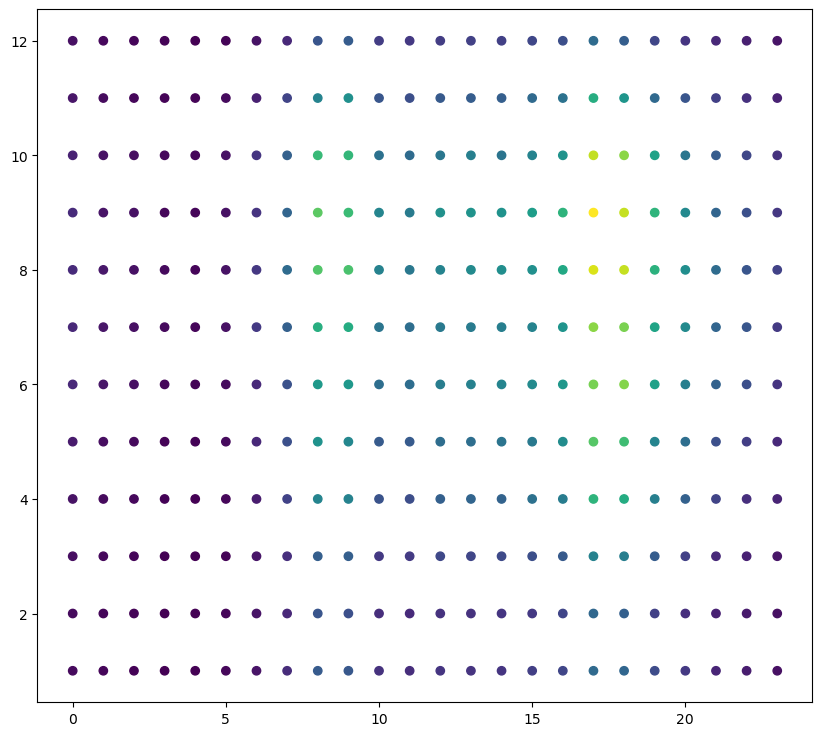

In [97]:
f, ax = plt.subplots(figsize=(10, 9), dpi=100)

ax = ax.scatter(dfFleet_usage_hourly_over_2019.start_time_hourly, dfFleet_usage_hourly_over_2019.start_month, 
                c=dfFleet_usage_hourly_over_2019.numOfRentedBikesHourly)
plt.show()

## 2.2 Geographical Demand Patterns

In this section, we will:
- Which stations are particularly popular and which are not? 
- Provide a rationale as to why you observe these patterns.

### 2.2.1 Preparing Data

#### 2.2.1.1 Prepare Dataframe for All Station Locations

In [ ]:
# definition to merge the latitude & longitude coordinates for one station in a single column
def mergeStartLocation(row):
    return (row["start_latitude"], row["start_longitude"])

def mergeEndLocation(row):
    return (row["end_latitude"],row["end_longitude"])

In [ ]:
# dataframe with all unique stations and their coordinates
station_startLocations = pd.DataFrame(dfPhiladelphia, columns=['start_station_id', 'start_station_name', 'start_latitude', 'start_longitude'])
station_startLocations['startLocation'] = station_startLocations.apply(lambda row: mergeStartLocation(row), axis=1)
station_startLocations.drop_duplicates(inplace=True)
station_startLocations.sort_values(by=['start_station_id'], inplace=True)
station_startLocations.reset_index(drop=True, inplace=True)

# dataframe with all unique stations and their coordinates
station_endLocations = pd.DataFrame(dfPhiladelphia, columns=['end_station_id', 'end_station_name', 'end_latitude', 'end_longitude'])
station_endLocations['endLocation'] = station_endLocations.apply(lambda row: mergeEndLocation(row), axis=1)
station_endLocations.drop_duplicates(inplace=True)
station_endLocations.sort_values(by=['end_station_id'], inplace=True)
station_endLocations.reset_index(drop=True, inplace=True)

# test whether the start & end locations are the same 
if(station_startLocations['start_station_id'].equals(station_endLocations['end_station_id'])):
    print(station_startLocations['start_station_id'].equals(station_endLocations['end_station_id']), 
          ": The dataframes for start & end locations are equeal and thereore the end locations can be neglected.")
else:
    print(station_startLocations['start_station_id'].equals(station_endLocations['end_station_id']), 
          ": Both Dataframes include different stations IDs and must be merged.")

In [ ]:
# rename dataframe for all locations and column "start station id"
station_locations = station_startLocations
station_locations.rename(columns={"start_station_id": "station_id"}, inplace = True)
station_locations.rename(columns={"start_station_name": "station_name"}, inplace = True)
station_locations.rename(columns={"start_latitude": "latitude"}, inplace = True)
station_locations.rename(columns={"start_longitude": "longitude"}, inplace = True)
station_locations.rename(columns={"startLocation": "location"}, inplace = True)

*Note:* The dataframe station_locations only includes stations which have entries in dfPhiladelphia which means only stations with bike trips are taken into account. Maybe import dfStations from Task 1. 

#### 2.2.1.2 Preparing and Computing the Least & Most Popular Start / End Stations

In [ ]:
# create a copied dataframe to further work with it
dfPhiladelphia_copy = dfPhiladelphia

# Firstly compute the most popular start stations in descending order
# accumulate the start stations ids 
start_stations = pd.DataFrame(dfPhiladelphia_copy, columns=['start_station_id', 'numOfRentedBikes']).fillna(1)

# count trips for every start station
start_stations = start_stations.groupby(['start_station_id'])['numOfRentedBikes'].count().reset_index()

# merge with station_location dataframe to enrich data with combined coordinates
start_stations = pd.merge(station_locations, start_stations, left_on="station_id", right_on="start_station_id", how="left")

# drop unneccessary column "start_station_id"
start_stations.drop(columns="start_station_id", inplace=True)

# sort in descending order
start_stations.sort_values(by=['numOfRentedBikes'], ascending=True, inplace=True, ignore_index=True)

# rename column
start_stations.rename(columns={"numOfRentedBikes": "numOfRentedBikes_start"}, inplace = True)

In [ ]:
# secondly compute the most popular end stations in descending order
# accumulate the start stations ids 
end_stations = pd.DataFrame(dfPhiladelphia_copy, columns=['end_station_id', 'numOfRentedBikes']).fillna(1)

# count trips for every start station
end_stations = end_stations.groupby(['end_station_id'])['numOfRentedBikes'].count().reset_index()

# merge with station_location dataframe to enrich data with combined coordinates
end_stations = pd.merge(station_locations, end_stations, left_on="station_id", right_on="end_station_id", how="left")

# drop unneccessary column "start_station_id"
end_stations.drop(columns="end_station_id", inplace=True)

# sort in descending order
end_stations.sort_values(by=['numOfRentedBikes'], ascending=True, inplace=True, ignore_index=True)

# rename column
end_stations.rename(columns={"numOfRentedBikes": "numOfRentedBikes_end"}, inplace = True)

In [ ]:
# Method for retrieving the top x interaction stations
# Compute sum of start and end, append all values of ending rentals to starting rentals 
# and then group by the station name and sum the counter values. Then sort and take the first x values.

# merge
combined_stations = pd.merge(start_stations, end_stations, left_on="station_id", right_on="station_id", how="left")

# rename columns
combined_stations.rename(columns={"station_name_x": "station_name"}, inplace = True)
combined_stations.rename(columns={"latitude_x": "latitude"}, inplace = True)
combined_stations.rename(columns={"longitude_x": "longitude"}, inplace = True)
combined_stations.rename(columns={"location_x": "location"}, inplace = True)

# add the number of rented bikes for each station 
combined_stations["numOfRentedBikes"] = combined_stations['numOfRentedBikes_start'] + combined_stations['numOfRentedBikes_end']

# drop unneccessary column 
combined_stations.drop(columns=['station_name_y', 'latitude_y', 'longitude_y', 'location_y'], inplace=True)

# sort in descending order
combined_stations.sort_values(by=['numOfRentedBikes'], ascending=True, inplace=True, ignore_index=True)

# rename column
combined_stations.rename(columns={"numOfRentedBikes": "numOfRentedBikes_combined"}, inplace = True)

### 2.2.2 Plot the Data for Least & Most Popular Stations

#### 2.2.2.1 Visualization of Data for the Most Popular Stations in Philadelphia

In [ ]:
# prepare dataframe combined_stations for plotting
popularity_stations = pd.DataFrame(combined_stations, columns=['station_name', 'numOfRentedBikes_start', 'numOfRentedBikes_end', 'numOfRentedBikes_combined'])

# set index to station name 
popularity_stations.set_index(['station_name'], inplace=True)

# Method to Plot the data
def plot_popularity_stations(popularity, x):
    if popularity == 'most popular':
        ax = popularity_stations.tail(x).plot(kind="barh", figsize=(60,40), fontsize=50, width=0.8)
        ax.set_xlabel('Number of rented bikes', fontsize=60)
        ax.set_ylabel('Station names', fontsize = 60)
        ax.set_title(label= str(x) + ' most popular starting stations', fontsize = 80)
        ax.legend(fontsize = 40)
    elif popularity == 'least popular':
        ax = popularity_stations.tail(x).plot(kind="barh", figsize=(60,40), fontsize=50, width=0.8)
        ax.set_xlabel('Number of rented bikes', fontsize=60)
        ax.set_ylabel('Station names', fontsize = 60)
        ax.set_title(label= str(x) + ' least popular starting stations', fontsize = 80)
        ax.legend(fontsize = 40)
    else:
        ax = 'Please define the popularity with either "most popular" or "least popular".'
    return ax

In [ ]:
plot_popularity_stations('most popular', 20)

#### 2.2.2.2 Visualization of Data for the Least Popular Stations in Philadelphia

In [ ]:
popularity_stations.sort_values(by=['numOfRentedBikes_combined'], ascending=False, inplace=True)

plot_popularity_stations('least popular', 20)

#### 2.2.2.3 Analysis of Distances of Popular Stations to City Center of Philadelphia

In order to put the most popular stations into context of Philadelphia, we calculate the distances from city center.

In [ ]:
# coordinates for city center of Philadelphia 
city_center_philly = [39.9525839, -75.1652215]

In [ ]:
# pip install geopy

In [ ]:
import geopy.distance
# method
def measure_distance_station_point_of_interest(dataframe, point_of_interest):
    # parse the location to a list
    locations_list = dataframe['location'].to_list()
    
    #empty list for output
    distance_point_of_interest = []
    
    # compute the distances for each station to Philadelphia city center
    if point_of_interest == 'City Center':
        for i in range(0, len(locations_list)):
            distance_point_of_interest.append(geopy.distance.geodesic(city_center_philly, locations_list[i]).m)
    else:
        return "False Statement in Method"
    return distance_point_of_interest

In [ ]:
df_distances = pd.DataFrame(combined_stations, columns=['station_id', 'station_name', 'location', 'numOfRentedBikes_combined'])
df_distances["dist_city_center"] = measure_distance_station_point_of_interest(combined_stations, 'City Center')
df_distances.sort_values(by=['dist_city_center'], ascending=True, inplace=True)

### 2.2.3 Geographical Visualization of Location Data

In [ ]:
# import folium for map creation
import folium
from folium import plugins
from folium.plugins import HeatMap

#### 2.2.3.1 Visualization of Most & Least Popular Stations (Start & End Combined)

In [ ]:
# Create a new map for Philadelphia
philadelphia = folium.Map(location=[station_locations.latitude.mean(), station_locations.longitude.mean()], zoom_start=12,
                          control_scale = True, tiles ='Stamen Toner')

In [ ]:
# function to add markers to the map
def add_markers_to_map(df1, city_map, color):
    for i in df1.index.values:
        
        s1 = "Station:"
        s2 = str(combined_stations.iloc[i]['station_name'])
        s3 = "Rides:"
        s4 = str(combined_stations.iloc[i]['numOfRentedBikes_combined'])
        station_info = s1 + " " + s2 + " " + s3 + " " + s4 
        
        folium.CircleMarker(
                location=combined_stations.iloc[i]['location'],
                radius=1,
                weight=5,
                color=color,
                popup= station_info
               ).add_to(philadelphia)

In [ ]:
# add markers for the remaining stations to map
add_markers_to_map(combined_stations.iloc[20:126], philadelphia, 'darkgrey')

# add markers for top 20 stations to map
add_markers_to_map(combined_stations.tail(20), philadelphia, 'lime')

# add markers for bottom 20 stations to map
add_markers_to_map(combined_stations.head(20), philadelphia, 'red')

In [ ]:
#philadelphia

#### 2.2.3.2 Visualizing the Amount of Trips at each Station via Heatmaps 

In [ ]:
phillyTrips = pd.DataFrame(dfPhiladelphia, columns=['start_station_id', 'end_station_id', 'bike_id', 'start_latitude',  'start_longitude', 'end_latitude', 'end_longitude'])
phillyTrips['startLocation'] = phillyTrips.apply(lambda row: mergeStartLocation(row), axis=1)
phillyTrips['endLocation'] = phillyTrips.apply(lambda row: mergeEndLocation(row), axis=1)

In [ ]:
# store all coordinates (start & end) of every trip in a list for heatmap 
heat_data = phillyTrips['startLocation'].to_list()
heat_data = heat_data + phillyTrips['endLocation'].to_list()

# create new map
philadelphia_heatmap = philadelphia

# add a heatmap
philadelphia_heatmap = philadelphia_heatmap.add_child(plugins.HeatMap(heat_data, zoom_start=13, radius=20))
#philadelphia_heatmap

### 2.2.4 Summary and Observed Patterns of Data

In [ ]:
combined_stations[['numOfRentedBikes_start', 'numOfRentedBikes_end','numOfRentedBikes_combined']].describe()

## 2.3 Key Performance Indicators (KPIs)

In this section, we will:
- Define at least (!) three KPIs that you would include in a dashboard for a fleet operators. These KPIs must provide an immediate overview of the current fleet operations and how well the fleet is doing in terms of **utilization**, **revenue**, **coverage** and/or **other business-related aspects**. 
- Briefly explain the rationale behind selecting each KPI, explain why you have chosen it and where needed provide references.
- Calculate hourly values for the selected
- KPIs for the city/year in your dataset and visualize them over time. Which trends do you observe? How do you explain them?

### 2.3.1 KPI: `Utilization`

### 2.3.2 KPI: `Revenue`

### 2.3.3 KPI: `Coverage`

### 2.3.4 KPI: `...`

### 2.3.5 KPI: `...`

### 2.3.6 Dashboard

In [ ]:
#sns.pairplot(tips, 
#             hue="sex", palette="magma",diag_kind ='kde', )
#plt.show()